In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

# Import local modules
import datasets

In [2]:
# Read in the dataset
X, Y = datasets.read_highweh_grid()
X = np.take(X, range(64), axis=1)
X.shape

(2211, 64)

In [3]:
# Do PCA and transform data
pca = PCA(n_components=3)
X_t = pca.fit_transform(X)
X_t.shape

(2211, 3)

In [4]:
# Compute the peak height for each model measurement
peak_height = np.max(X, axis=1)
peak_height.shape

(2211,)

(0.9953625996146379, 0.0)


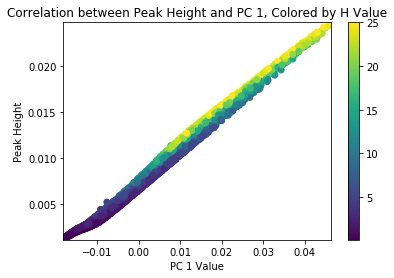

In [5]:
# Plot correlation between PC1 and peak height colored by H
fig, ax = plt.subplots(1)
p = ax.scatter(X_t[:,0], peak_height, c=Y[:,0])
fig.colorbar(p)
ax.set_ylabel('Peak Height')
ax.set_xlabel('PC 1 Value')
ax.set_ylim(np.min(peak_height), np.max(peak_height))
ax.set_xlim(np.min(X_t[:,0]), np.max(X_t[:,0]))
ax.set_title('Correlation between Peak Height and PC 1, Colored by H Value')
print pearsonr(X_t[:,0], peak_height)

Text(0.5,1,u'Correlation between Peak Height and PC 1, Colored by BNACS Value')

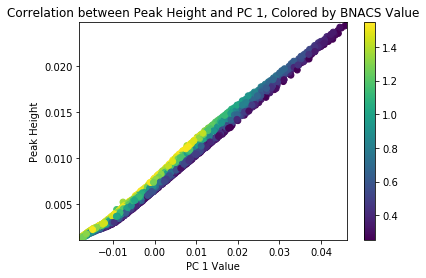

In [6]:
# Plot correlation between PC1 and peak height colored by BNACS
fig, ax = plt.subplots(1)
p = ax.scatter(X_t[:,0], peak_height, c=Y[:,1])
fig.colorbar(p)
ax.set_ylabel('Peak Height')
ax.set_xlabel('PC 1 Value')
ax.set_ylim(np.min(peak_height), np.max(peak_height))
ax.set_xlim(np.min(X_t[:,0]), np.max(X_t[:,0]))
ax.set_title('Correlation between Peak Height and PC 1, Colored by BNACS Value')

In [7]:
# Compute the flux-weighted time of arrival for each model measurement
def fwta(time_bins, counts):
    fwtas = np.ndarray(counts.shape[0])
    for i in range(counts.shape[0]):
        w_sum = 0
        for t in range(counts.shape[1]):
            w_sum += time_bins[t] * counts[i,t]
        fwtas[i] = w_sum / float(np.sum(counts[i,:]))
    return fwtas
arr_time = fwta(datasets.time_bins_dan[:-1], X)

(0.6996296043099897, 0.0)


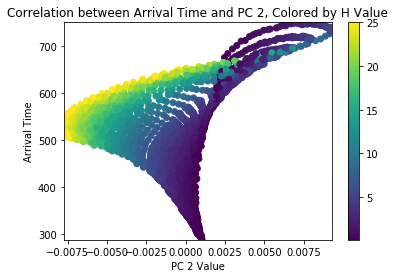

In [8]:
# Plot correlation between PC2 and arrival time colored by H
fig, ax = plt.subplots(1)
p = ax.scatter(X_t[:,1], arr_time, c=Y[:,0])
fig.colorbar(p)
ax.set_ylabel('Arrival Time')
ax.set_xlabel('PC 2 Value')
ax.set_ylim(np.min(arr_time), np.max(arr_time))
ax.set_xlim(np.min(X_t[:,1]), np.max(X_t[:,1]))
ax.set_title('Correlation between Arrival Time and PC 2, Colored by H Value')
print pearsonr(X_t[:,0], arr_time)

In [ ]:
# Plot correlation between PC2 and arrival time colored by BNACS
fig, ax = plt.subplots(1)
p = ax.scatter(X_t[:,1], arr_time, c=Y[:,1])
fig.colorbar(p)
ax.set_ylabel('Arrival Time')
ax.set_xlabel('PC 2 Value')
ax.set_ylim(np.min(arr_time), np.max(arr_time))
ax.set_xlim(np.min(X_t[:,1]), np.max(X_t[:,1]))
ax.set_title('Correlation between Arrival Time and PC 2, Colored by BNACS Value')

Text(0.5,1,u'Correlation between Arrival Time and PC 2, Colored by BNACS Value')

In [ ]:
fig, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
h_max = 25.1
bnacs_max = 1.524
cs = ax3.tricontour(X_t[:,0], X_t[:,1], Y[:,0], levels=np.arange(0, h_max, 0.5), linewidths=0.5, colors='k')
ax3.clabel(cs, fontsize=8, inline=1, fmt='%1.1f')
cntr2 = ax3.tricontourf(X_t[:,0], X_t[:,1], Y[:,0], levels=np.arange(0, h_max, 0.1), cmap="BrBG", alpha=0.7)

cs2 = ax4.tricontour(X_t[:,0], X_t[:,1], Y[:,1], levels=np.arange(0, bnacs_max, 0.15), linewidths=0.5, colors='k')
ax4.clabel(cs2, fontsize=8, inline=1, fmt='%1.2f')
cntr3 = ax4.tricontourf(X_t[:,0], X_t[:,1], Y[:,1], levels=np.arange(0, bnacs_max, 0.15), cmap="copper_r", alpha=0.7)

fig.colorbar(cntr2, ax=ax3)
fig.colorbar(cntr3, ax=ax4)

ax3.set_xlabel('Peak Height (PC 1)')
ax3.set_ylabel('Arrival Time (PC 2)')

ax4.set_xlabel('Peak Height (PC 1)')
ax4.set_ylabel('Arrival Time (PC 2)')

ax3.set_title('PC1 and PC2 vs. H')
ax4.set_title('PC1 and PC2 vs. $\Sigma_{abs}$')

In [ ]:
d = 5.0
for h in np.arange(1.0, 25.1, d):
    h = np.round(h, 2) # for precision reasons
    y = Y[np.where(Y[:,0] == h)]
    p = peak_height[np.where(Y[:,0] == h)]
    # get the sorted indices for bnacs then sort everything
    perm = np.argsort(y[:,1])
    y = y[perm]
    p = p[perm]
    print p.shape
    # plot the change in peak height for increments in BNACS
    delta_p = []
    for i in range(y[:,1].shape[0]):
        if i == 0:
            delta_p.append(0)
        else:
            delta_p.append(p[i]-p[i-1])
    fixed_bnacs = [0.26, 0.306, 0.352, 0.398, 0.444, 0.49, 0.536, 0.586, 0.635, 0.685, 0.734, 0.784, 0.833, 0.882, 0.931, 0.979, 1.028, 1.076, 1.125, 1.173, 1.221, 1.269, 1.316, 1.364, 1.411, 1.459, 1.506, 1.521]
    plt.scatter(fixed_bnacs[1:], np.abs(np.round((delta_p[1:]/p[1:])*100, 2)), label='WEH = %f' % h)
    #plt.scatter(y[:,1][1:], np.abs(np.round((delta_p[1:]/p[1:])*100, 2)), label='WEH = %f' % h)
plt.legend()
plt.ylabel('Percent Decrease in Peak Height')
plt.xlabel('$\Sigma_{abs}$')

This plot is based on Figure 3 from Hardgrove et al. 2011. It shows the percent decrease in thermal peak height with increasing absorber content, given different fixed amounts of WEH.

The BNACS values vary a little bit as different amounts of H affect the computed BNACS value, so instead of using the true BNACS values for each combination of H, Cl, and Fe, I am using the values for a fixed H, Cl, and Fe. 

Each "column" of points has N points for each H value displayed (5 in the current plot). For example, in the first two columns: the % decrease in peak height from 0.306 to 0.352 b is much greater when there's 1 wt % WEH than 21 wt % WEH. 

This plot, in addition to the contour plot, shows how this relationship does not hold for all changes in BNACS, i.e. 0.1 wt % WEH does not always result in the greatest % decrease in peak height compared to the other values. 

In [ ]:
d = 5.0
for h in np.arange(1.0, 25.1, d):
    h = np.round(h, 2) # for precision reasons
    y = Y[np.where(Y[:,0] == h)]
    p = arr_time[np.where(Y[:,0] == h)]
    # get the sorted indices for bnacs then sort everything
    perm = np.argsort(y[:,1])
    y = y[perm]
    p = p[perm]
    print p.shape
    # plot the change in FWTA for increments in BNACS
    delta_p = []
    for i in range(y[:,1].shape[0]):
        if i == 0:
            delta_p.append(0)
        else:
            delta_p.append(p[i]-p[i-1])
    fixed_bnacs = [0.26, 0.306, 0.352, 0.398, 0.444, 0.49, 0.536, 0.586, 0.635, 0.685, 0.734, 0.784, 0.833, 0.882, 0.931, 0.979, 1.028, 1.076, 1.125, 1.173, 1.221, 1.269, 1.316, 1.364, 1.411, 1.459, 1.506, 1.521]
    plt.scatter(fixed_bnacs[1:], np.abs(np.round((delta_p[1:]/p[1:])*100, 2)), label='WEH = %f' % h)
    #plt.scatter(y[:,1][1:], np.abs(np.round((delta_p[1:]/p[1:])*100, 2)), label='WEH = %f' % h)
plt.legend()
plt.ylabel('Percent Decrease in FWTA')
plt.xlabel('$\Sigma_{abs}$')

This is a similarly formatted plot as the previous one, but now we are looking at the % decrease in FWTA. We observed in the previous plot that the relative ordering of the different WEH-level points was not the same across all changes in BNACS values. However in this plot, the relative ordering does seem to hold (for the most part): i.e., 1 wt % WEH always results in a greater decrease in FWTA than 21 wt % WEH for different changes in BNACS.